In [ ]:
  %%html
<marquee style='width: 100%; color: orange;'><b>Supervised by DR/ Mohamed Mostafa</b></marquee>
<marquee style='width: 100%; color: pink;'><b>Supervised by Eng/ Asmaa el saeed</b></marquee>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive


In [ ]:
#check for gpu
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#connect to drive
drive.mount("//content//gdrive")

Drive already mounted at //content//gdrive; to attempt to forcibly remount, call drive.mount("//content//gdrive", force_remount=True).


In [ ]:
#read first data
f_df=pd.read_csv('/content/gdrive/MyDrive/pre_data.csv')
f_df.head()

,Sentiment,Title,Review,detect,clean text,text_len
0,0,Why SETI? Why Not STI?,If even 1% of the budget spent on SETI (the Se...,True,if even of the budget spent on seti the search...,225
1,0,Terrible sound,The sound from the ear buds suck. Sounds like ...,True,the sound from the ear buds suck sounds like m...,104
2,0,The Harlequin Romance Novel of Fantasy,Unless you are a fan of romance novels I can't...,True,unless you are a fan of romance novels i can n...,554
3,1,Charges Deep Cycles Well,Purchased the SSC-1500A to replace a less expe...,True,purchased the sec a to replace a less expensiv...,388
4,0,Terrible Product!,First of all...do not purchase this as a gift ...,True,first of all do not purchase this as a gift fo...,691


In [ ]:
#read secound data
s_df=pd.read_csv('/content/gdrive/MyDrive/Copy of pre_data2.csv')
s_df.head()

,Sentiment,Title,Review,detect,clean text,text_len
0,0,"Yes Marshall Mathers, Please Take A Bow.","Because you are FINISHED. Your ""moment in the ...",True,because you are finished your moment in the su...,147
1,0,thank you,This one gift I could give my grown daughter. ...,True,this one gift i could give my grown daughter i...,123
2,0,Recommend a no buy,I bought one for my daughter and advised a fri...,True,i bought one for my daughter and advised a fri...,761
3,1,Great!,When there are sequels one is always suspiciou...,True,when there are sequels one is always suspiciou...,191
4,0,My first Ongala disappointment,I thought this was one of Ongala's original re...,True,i thought this was one of gala i original reco...,413


In [ ]:
#Collect data as a single data frame
df=pd.concat([f_df,s_df])
df

,Sentiment,Title,Review,detect,clean text,text_len
0,0,Why SETI? Why Not STI?,If even 1% of the budget spent on SETI (the Se...,True,if even of the budget spent on seti the search...,225
1,0,Terrible sound,The sound from the ear buds suck. Sounds like ...,True,the sound from the ear buds suck sounds like m...,104
2,0,The Harlequin Romance Novel of Fantasy,Unless you are a fan of romance novels I can't...,True,unless you are a fan of romance novels i can n...,554
3,1,Charges Deep Cycles Well,Purchased the SSC-1500A to replace a less expe...,True,purchased the sec a to replace a less expensiv...,388
4,0,Terrible Product!,First of all...do not purchase this as a gift ...,True,first of all do not purchase this as a gift fo...,691
...,...,...,...,...,...,...
251031,0,..,The coverart to this DVD set looks horrible.Do...,True,the covert to this did set looks horrible does...,151
251032,0,Absolutely the lowest,If there was a negative star rating I would us...,True,if there was a negative star rating i would us...,311
251033,0,Nothing new here,This is something that any first year business...,True,this is something that any first year business...,123
251034,1,An Amazing Literary Success,As an author with my debut novel in its initia...,True,as an author with my debut novel in its initia...,548


In [ ]:
# reset the index
df.reset_index(drop=True, inplace=True)
df

,Sentiment,Title,Review,detect,clean text,text_len
0,0,Why SETI? Why Not STI?,If even 1% of the budget spent on SETI (the Se...,True,if even of the budget spent on seti the search...,225
1,0,Terrible sound,The sound from the ear buds suck. Sounds like ...,True,the sound from the ear buds suck sounds like m...,104
2,0,The Harlequin Romance Novel of Fantasy,Unless you are a fan of romance novels I can't...,True,unless you are a fan of romance novels i can n...,554
3,1,Charges Deep Cycles Well,Purchased the SSC-1500A to replace a less expe...,True,purchased the sec a to replace a less expensiv...,388
4,0,Terrible Product!,First of all...do not purchase this as a gift ...,True,first of all do not purchase this as a gift fo...,691
...,...,...,...,...,...,...
502098,0,..,The coverart to this DVD set looks horrible.Do...,True,the covert to this did set looks horrible does...,151
502099,0,Absolutely the lowest,If there was a negative star rating I would us...,True,if there was a negative star rating i would us...,311
502100,0,Nothing new here,This is something that any first year business...,True,this is something that any first year business...,123
502101,1,An Amazing Literary Success,As an author with my debut novel in its initia...,True,as an author with my debut novel in its initia...,548


In [ ]:
#rename the column
df.columns=["Sentiment","Title","Review","Detect","Clean_Text","Text_Len"]
df.head()

,Sentiment,Title,Review,Detect,Clean_Text,Text_Len
0,0,Why SETI? Why Not STI?,If even 1% of the budget spent on SETI (the Se...,True,if even of the budget spent on seti the search...,225
1,0,Terrible sound,The sound from the ear buds suck. Sounds like ...,True,the sound from the ear buds suck sounds like m...,104
2,0,The Harlequin Romance Novel of Fantasy,Unless you are a fan of romance novels I can't...,True,unless you are a fan of romance novels i can n...,554
3,1,Charges Deep Cycles Well,Purchased the SSC-1500A to replace a less expe...,True,purchased the sec a to replace a less expensiv...,388
4,0,Terrible Product!,First of all...do not purchase this as a gift ...,True,first of all do not purchase this as a gift fo...,691


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502103 entries, 0 to 502102
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Sentiment   502103 non-null  int64 
 1   Title       502103 non-null  object
 2   Review      502103 non-null  object
 3   Detect      502103 non-null  bool  
 4   Clean_Text  502100 non-null  object
 5   Text_Len    502103 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 19.6+ MB


In [ ]:
print("The shape of our data:",df.shape,"\n")

The shape of our data: (502103, 6) 



In [ ]:
# checking for null values
df.isna().sum()

Sentiment     0
Title         0
Review        0
Detect        0
Clean_Text    3
Text_Len      0
dtype: int64

In [ ]:
# dropping null values
df = df.dropna()

In [ ]:
print("The shape of our data:",df.shape,"\n")

The shape of our data: (502100, 6) 



In [ ]:
#Check for duplicates in the comments
df.duplicated().sum()

0

In [ ]:
df1 = df

In [ ]:
min_val_sum = min(df1["Title"], key=len)
max_val_sum = max(df1["Title"], key=len)
min_val_re = min(df1["Review"], key=len)
max_val_re = max(df1["Review"], key=len)
count_of_words = df1['Review'].str.len().sum()


In [ ]:
df_sumray=pd.DataFrame(data=[[min_val_sum,len(min_val_sum)],[max_val_sum,len(max_val_sum)],
                        [min_val_re,len(min_val_re)],[max_val_re,len(max_val_re)],['nan',count_of_words]],
                       index=['min value title','max value title','min value review','max value review','count of total Letters'],
                       columns=['Text','count of Letters'])
df_sumray

,Text,count of Letters
min value title,*,1
max value title,Dogswell Duck Strip poisoned and killed 1 Std....,128
min value review,drek,4
max value review,ehh this cd has alot of hype but not to much g...,1009
count of total Letters,nan,203559825


In [ ]:
#Check the length value
len(df_sumray['Text'][3])

1009

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot for Sentiment Labels')

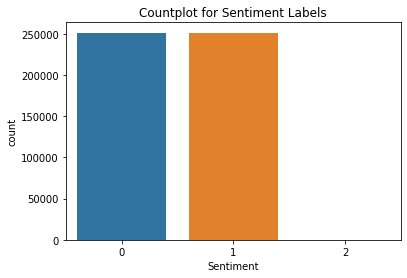

In [ ]:
sns.countplot(df1['Sentiment'])
plt.title("Countplot for Sentiment Labels")

In [ ]:
df1['Sentiment'].value_counts()

0    251479
1    250620
2         1
Name: Sentiment, dtype: int64

In [ ]:
df1.Sentiment.replace({2:1},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot for Sentiment Labels')

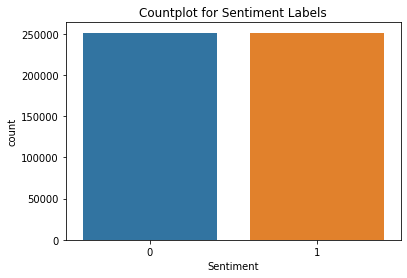

In [ ]:
sns.countplot(df1['Sentiment'])
plt.title("Countplot for Sentiment Labels")

In [ ]:
df1['Sentiment'].value_counts()

0    251479
1    250621
Name: Sentiment, dtype: int64

In [ ]:
#pip install tensorflow_text

In [ ]:
neg = df1[df1['Sentiment']==0]
len(neg)

251479

In [ ]:
pos = df1[df1['Sentiment']==1]
len(pos)

250621

In [ ]:
df2=df1

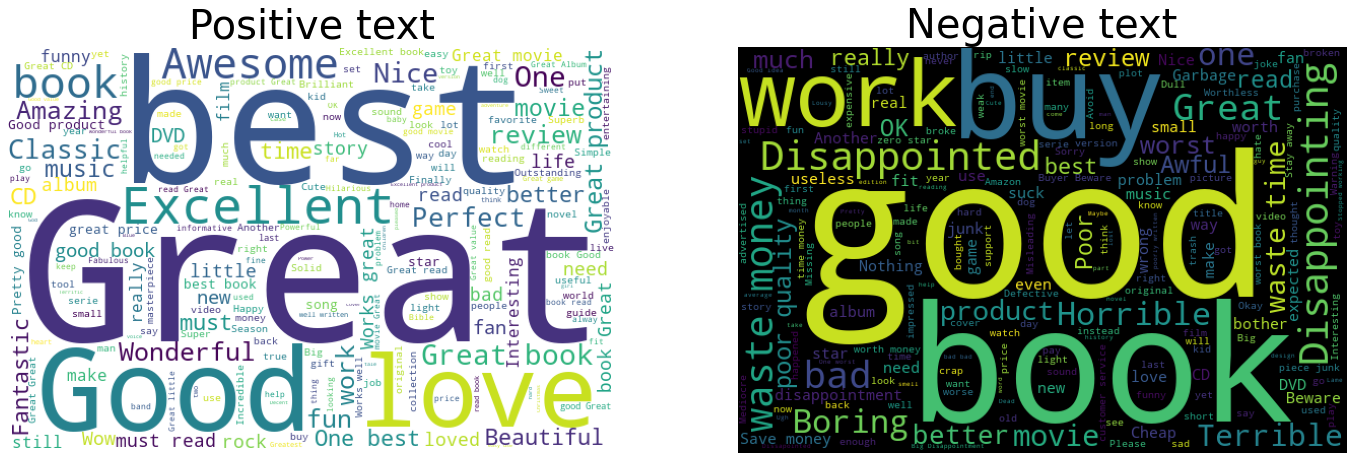

In [ ]:
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[24, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(pos['Title'].values))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive text',fontsize=40);

wordcloud2 = WordCloud( background_color='black',
                        width=600,
                        height=400).generate(" ".join(neg['Title']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative text',fontsize=40);

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# one line split data
X_train, X_test, y_train, y_test = train_test_split(df2['Clean_Text'], df2['Sentiment'],
                                    test_size = 0.15, random_state = 0,shuffle=False,stratify= None)

In [ ]:
print(f'Length test: {len(X_test)}\nLength train: {len(X_train)}')

Length test: 75315
Length train: 426785


In [ ]:
#check for balance
y_test.value_counts()

0    37869
1    37446
Name: Sentiment, dtype: int64

In [ ]:
#check for balance
y_train.value_counts()

0    213610
1    213175
Name: Sentiment, dtype: int64

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
#pip install tensorflow_text

In [ ]:
import tensorflow_text as text

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", name='preprocessing')
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2", name='BERT_encoder')

In [ ]:
#example of bert_preprocess
text_test = ['this is such an amazing movie! play playing']
text_preprocessed = bert_preprocess(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :13]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :13]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :13]}')

Keys       : ['input_mask', 'input_word_ids', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999 2377 2652  102    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_results = bert_encoder(text_preprocessed)

print(f'Loaded BERT: {bert_results.keys()}\n')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}\n')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}\n')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}\n')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: dict_keys(['encoder_outputs', 'default', 'pooled_output', 'sequence_output'])

Pooled Outputs Shape:(1, 512)

Pooled Outputs Values:[ 0.9654756   0.9862473  -0.06326453  0.24232171 -0.14467108  0.6551392
  0.9874416  -0.9782184   0.10369921 -0.9698505   0.07748935 -0.9712603 ]

Sequence Outputs Shape:(1, 128, 512)

Sequence Outputs Values:[[-0.43920803  0.26996425  0.31884643 ...  0.28496307  0.55303395
   0.27682763]
 [-0.36163035  0.27675757 -0.20971023 ...  0.6871395  -0.1916013
   1.0277038 ]
 [-0.7858621   0.47314805 -0.7168392  ...  0.19969034 -0.2681846
   0.6427952 ]
 ...
 [ 0.9806951  -0.22267908  0.03071597 ...  0.4916389   1.5341994
  -0.15679836]
 [-0.15319419 -0.00775333  0.26757014 ...  0.6515352   1.10209
   0.3294879 ]
 [-0.03606518  0.07966199  0.13132623 ...  0.5176823   1.3955802
   0.30922163]]


In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "what is yor name",
    "how are you"]
)

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[ 0.9898645 ,  0.8351302 , -0.03209895, ...,  0.06116562,
        -0.21979713,  0.1667231 ],
       [ 0.9884028 ,  0.48707736, -0.22669311, ...,  0.2744829 ,
        -0.42668054, -0.63725924]], dtype=float32)>

In [ ]:
e = get_sentence_embeding(X_train.head().values)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(e)

array([[1.0000001 , 0.769655  , 0.72984684, 0.7651979 , 0.7421756 ],
       [0.769655  , 1.0000002 , 0.622692  , 0.6264624 , 0.6929357 ],
       [0.72984684, 0.622692  , 0.99999964, 0.79721594, 0.81420225],
       [0.7651979 , 0.6264624 , 0.79721594, 0.9999998 , 0.83414936],
       [0.7421756 , 0.6929357 , 0.81420225, 0.83414936, 1.0000002 ]],
      dtype=float32)

In [ ]:
def build_classifier_model():
# Bert layers
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessed_text = bert_preprocess(text_input)
  outputs = bert_encoder(preprocessed_text)

# Neural network layers
  l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs["pooled_output"])
  l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
  model = tf.keras.Model(inputs=[text_input], outputs = [l])
  #active layers
  for layer in model.layers:
    layer.trainable = True
    print(layer.trainable)
  return model

In [ ]:
model=build_classifier_model()

True
True
True
True
True


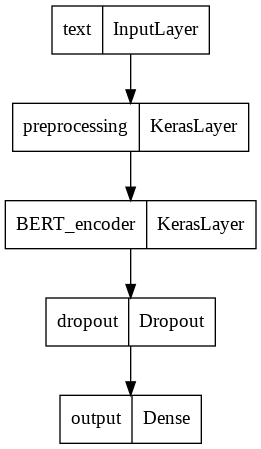

In [ ]:
tf.keras.utils.plot_model(model)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:
accuracy=tf.keras.metrics.BinaryAccuracy()
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
tf.config.get_visible_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=2)
# Run training on GPU
history=model.fit(X_train, y_train,epochs=5,validation_split=0.18)


Epoch 1/5
10937/10937 [==============================] - 1890s 173ms/step - loss: 0.3393 - accuracy: 0.8489 - val_loss: 0.2739 - val_accuracy: 0.8945
Epoch 2/5
10937/10937 [==============================] - 1883s 172ms/step - loss: 0.2464 - accuracy: 0.8989 - val_loss: 0.2367 - val_accuracy: 0.9044
Epoch 3/5
10937/10937 [==============================] - 1868s 171ms/step - loss: 0.2124 - accuracy: 0.9152 - val_loss: 0.2225 - val_accuracy: 0.9138
Epoch 4/5
10937/10937 [==============================] - 1874s 171ms/step - loss: 0.1896 - accuracy: 0.9256 - val_loss: 0.2157 - val_accuracy: 0.9197
Epoch 5/5
10937/10937 [==============================] - 1886s 172ms/step - loss: 0.1713 - accuracy: 0.9342 - val_loss: 0.2075 - val_accuracy: 0.9217


In [ ]:
model.evaluate(X_test, y_test)


2354/2354 [==============================] - 214s 91ms/step - loss: 0.2113 - accuracy: 0.9201


[0.2112937569618225, 0.9201221466064453]

<built-in method keys of dict object at 0x7ff4c3216550>


Text(0.5, 1.0, 'Training and Validation Accuracy')

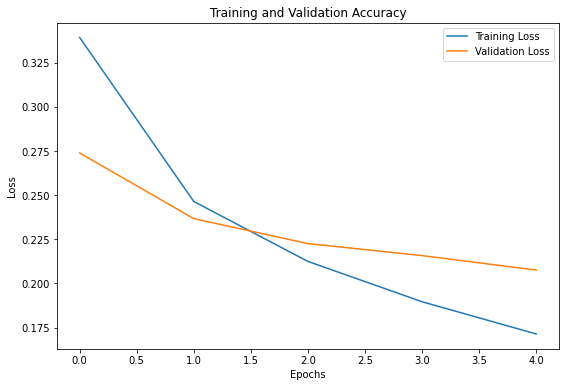

In [ ]:
history_dict = history.history
print(history_dict.keys)
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(9,6))
plt.plot(loss,label="Training Loss")
plt.plot(val_loss,label="Validation Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

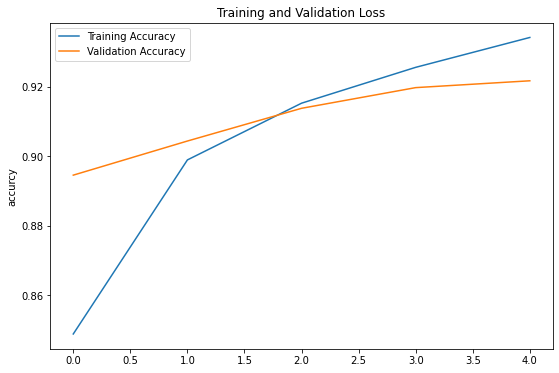

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.ylabel("accurcy")
plt.title("Training and Validation Loss")

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

2354/2354 [==============================] - 200s 85ms/step


In [ ]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[35376,  2493],
       [ 3523, 33923]])

Text(33.0, 0.5, 'Truth')

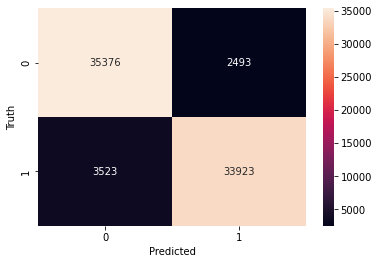

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     37869
           1       0.93      0.91      0.92     37446

    accuracy                           0.92     75315
   macro avg       0.92      0.92      0.92     75315
weighted avg       0.92      0.92      0.92     75315



In [ ]:
reviews = [
    'I bought this watch, registered it on Fossil’s website and then took it to a store in the mall to get it engraved as a present for the man in my life. He loves it and wears it every day',
    'The ghost of John Candy came to me in a dream and suggested this watch.',
    'awful scam to run. Scummy people ruin things.',
    'They were very thin. Not good quality',
    "Video quality is better then their v2 cameras, but I bought this for the full color night vision recording but as you can see in the picture that feature doesn't seem to be working just looks like normal night vision and that's with the IR light off. Very disappointed hopefully something will be updated in the software.",
    ]
m1=model.predict(reviews)

1/1 [==============================] - 0s 409ms/step


In [ ]:
m1

array([[9.9359518e-01],
       [7.0823121e-01],
       [4.4219589e-04],
       [1.1130860e-03],
       [2.2266587e-02]], dtype=float32)

In [ ]:
for i in m1:
  print(i)

[0.9935952]
[0.7082312]
[0.0004422]
[0.00111309]
[0.02226659]
